In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

# Data Preprocessing:

In [ ]:
data.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
data.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [ ]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

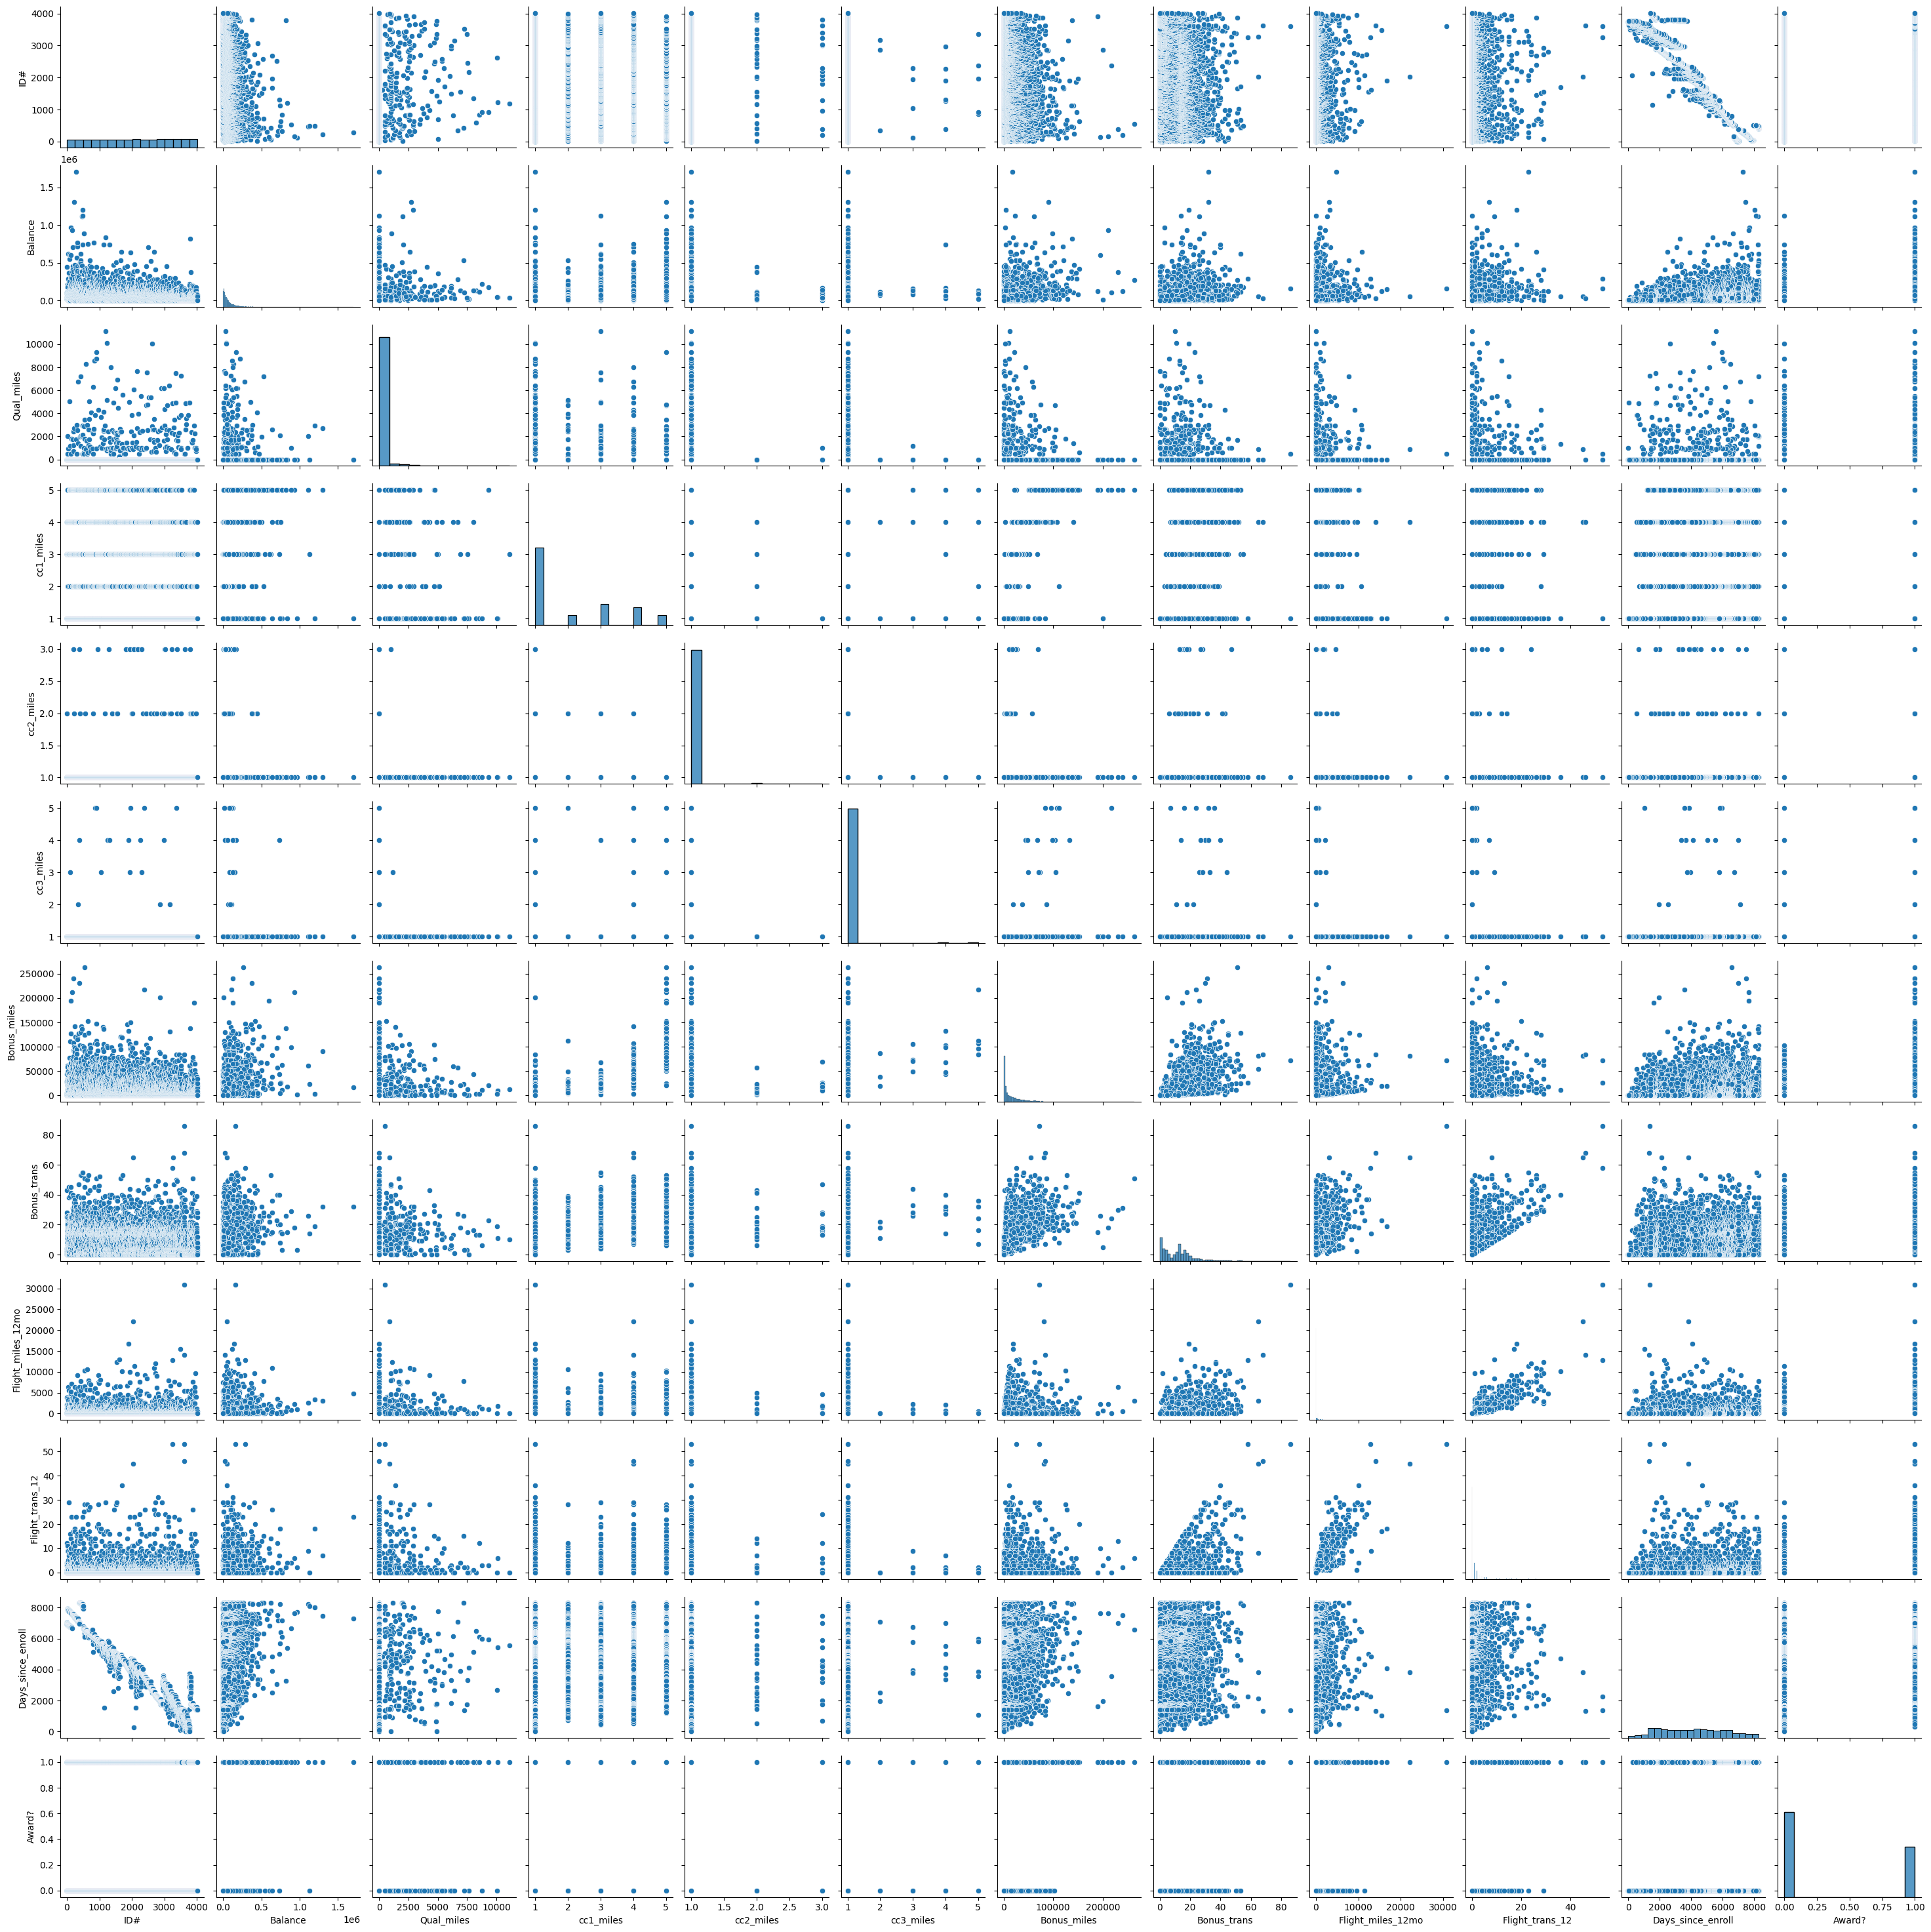

In [ ]:
sns.pairplot(data)
plt.show()

# 2. Implementing Clustering Algorithms

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

## K-Mean

In [ ]:
#k-mean
#wcss measures the distance between each observation and the centroid and calculates the squared difference between the two.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,n_init='auto', init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

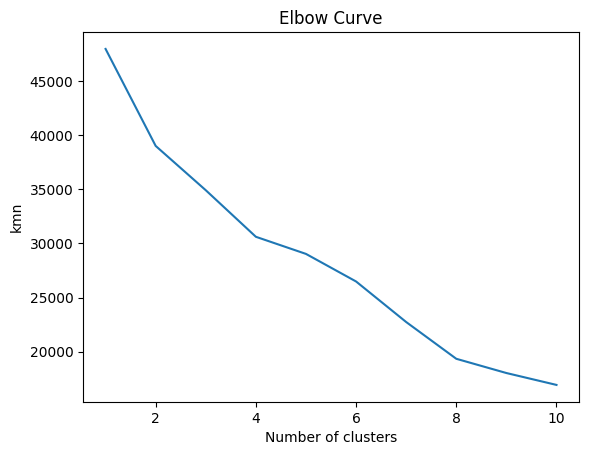

In [ ]:
# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('kmn')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3,n_init='auto', init='k-means++', random_state=42)
kmeans.fit(scaled_data)
kmeans_labels = kmeans.labels_

In [ ]:
data['clusterid_new'] = kmeans.labels_
data

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clusterid_new  
0          0              2  
1          0              2  
2          0              2  
3          0              2  
4          1              1  
...      ...            ...  
3994       1              0  
3995       1              0  
3996       1              0  
3997       0              0  
3998       0              0  

[3999 rows x 13 columns]

## DB SCAN

In [ ]:
nn = NearestNeighbors(n_neighbors=3)
nn.fit(scaled_data)
dist, indices = nn.kneighbors(scaled_data)
dist = np.sort(dist, axis=0)
dist = dist[:,1]

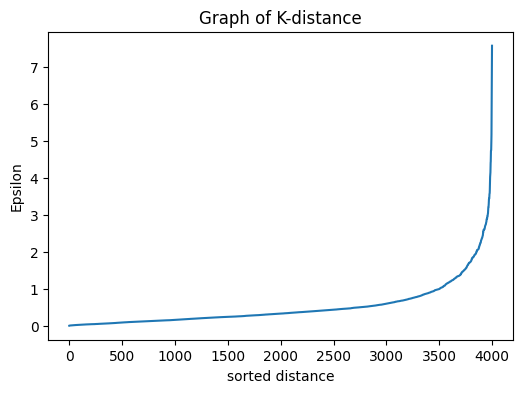

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(dist)
plt.title('Graph of K-distance')
plt.xlabel('sorted distance')
plt.ylabel('Epsilon')
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_db = dbscan.fit_predict(scaled_data)

In [ ]:
labels_db

array([ 0,  0,  0, ..., -1,  0,  0])

## Hierarchial Clustering

In [ ]:
#linkage criteria can be changed on data
agc = AgglomerativeClustering(n_clusters=3, linkage='ward')
agc_labels = agc.fit_predict(scaled_data)

In [ ]:
agc_labels

array([0, 0, 0, ..., 1, 0, 0])

# Visualization

In [ ]:
x=scaled_data[:,0]
y=scaled_data[:,1]

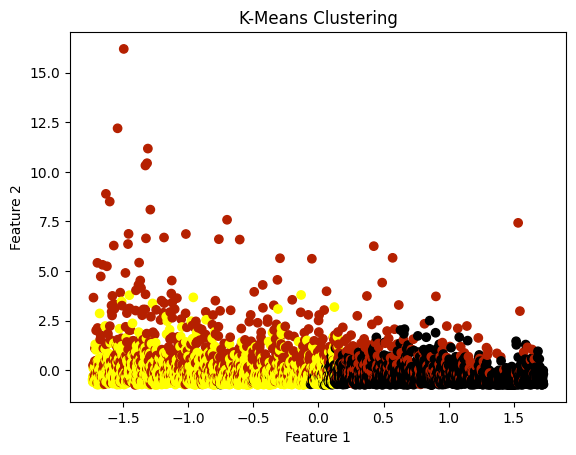

In [ ]:
# Plot the clusters using scatter plot
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='gnuplot')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Evaluation and Performance Metrics

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# Silhouette score for K-Means
kmeans_ss = silhouette_score(scaled_data, kmeans_labels)
print("K-Means Silhouette Score:-\n", kmeans_ss)

K-Means Silhouette Score:-
 0.201891717665419


In [ ]:
# Silhouette score for DBSCAN
dbscan_ss = silhouette_score(scaled_data, labels_db)
print("DBSCAN Silhouette Score:-\n", dbscan_ss)

DBSCAN Silhouette Score:-
 -0.2823258834687895


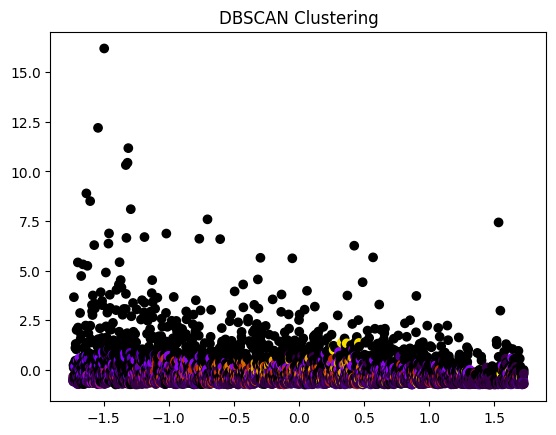

In [ ]:
# Visualize DBSCAN clustering
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_db, cmap='gnuplot')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
#cluster centers are calculated
cc = scaler.inverse_transform(kmeans.cluster_centers_)
for i, centroid in enumerate(cc):
    print(f"Cluster {i+1} centroid:", centroid)

Cluster 1 centroid: [3.10758124e+03 4.10851937e+04 1.08332925e+02 1.44328633e+00
 1.01655426e+00 1.00183936e+00 6.91149418e+03 8.12814224e+00
 2.37134887e+02 6.90374004e-01 2.20336052e+03 2.25015328e-01]
Cluster 2 centroid: [1.53387293e+03 1.50218949e+05 2.97365702e+02 3.83367769e+00
 1.00723140e+00 1.04648760e+00 4.82495124e+04 2.16373967e+01
 1.19756818e+03 3.58987603e+00 4.98392562e+03 7.50000000e-01]
Cluster 3 centroid: [1.07429214e+03 5.85070107e+04 7.98378571e+01 1.55071429e+00
 1.01714286e+00 1.00071429e+00 7.56004643e+03 8.71000000e+00
 2.09821429e+02 6.37142857e-01 5.75142714e+03 2.77142857e-01]


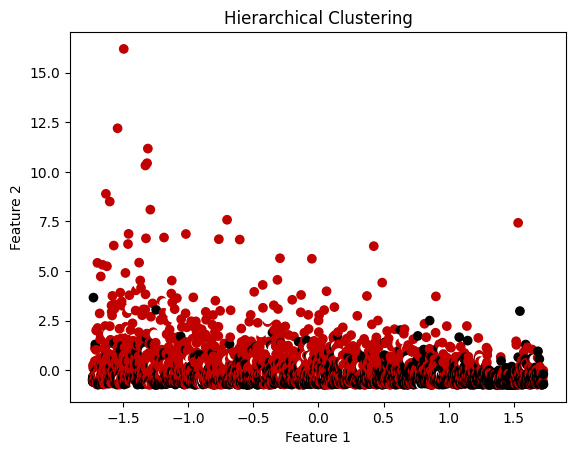

In [ ]:
# Visualize hierarchical clustering
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c =agc_labels, cmap='gist_heat')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Silhouette score for Hierarchical Clustering
agg_ss = silhouette_score(scaled_data, agc_labels)
print("Hierarchical Clustering Silhouette Score:", agg_ss)

Hierarchical Clustering Silhouette Score: 0.20526614352218822


# Dendrogram

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler

In [ ]:
MM_scaler=MinMaxScaler()

In [ ]:
norm_data=MM_scaler.fit_transform(data.iloc[:,1:])

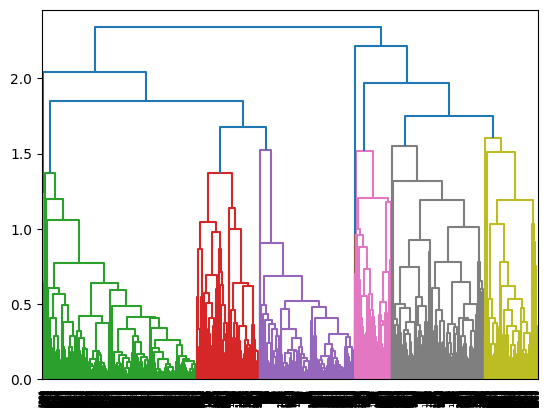

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(norm_data, method='complete'))